In [2]:
import pandas as pd

# Charger le dataset
file_path = "IMDB Dataset.csv"  # Remplace par le chemin vers ton fichier
df = pd.read_csv(file_path)

# Afficher les 5 premières lignes
print("Aperçu des premières lignes du dataset :")
print(df.head())


Aperçu des premières lignes du dataset :
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
# Afficher des informations sur le dataset
print("\nInformations sur le dataset :")
print(df.info())


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


Le dataset est bien structuré avec 50 000 lignes et 2 colonnes.
Aucune donnée n'est manquante dans les colonnes review et sentiment.
Les deux colonnes sont de type object (texte). Cela signifie que tu pourras travailler directement avec les critiques et les sentiments après un éventuel nettoyage ou transformation.

In [5]:
# Afficher des statistiques descriptives
print("\nStatistiques descriptives des colonnes numériques :")
print(df.describe())


Statistiques descriptives des colonnes numériques :
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [7]:
# Vérifier la présence de valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())



Valeurs manquantes par colonne :
review       0
sentiment    0
dtype: int64


In [9]:
print(df.duplicated().sum())

418


In [13]:
duplicates = df[df.duplicated()]
print(duplicates)

                                                  review sentiment  \
3537   Quite what the producers of this appalling ada...  negative   
3769   My favourite police series of all time turns t...  positive   
4391   Beautiful film, pure Cassavetes style. Gena Ro...  positive   
6352   If you liked the Grinch movie... go watch that...  negative   
6479   I want very much to believe that the above quo...  negative   
...                                                  ...       ...   
49912  This is an incredible piece of drama and power...  positive   
49950  This was a very brief episode that appeared in...  negative   
49984  Hello it is I Derrick Cannon and I welcome you...  negative   
49986  This movie is a disgrace to the Major League F...  negative   
49991  Les Visiteurs, the first movie about the medie...  negative   

       review_length  
3537            2308  
3769             488  
4391             696  
6352             548  
6479            2750  
...              ... 

In [74]:
# Vérifier si des valeurs de sentiement sont mal orthographiées ou incohérentes
unique_values = df["sentiment"].unique()
expected_values = {"positive", "negative"}
incorrect_values = set(unique_values) - expected_values
if incorrect_values:
    print(f"\nValeurs incorrectes détectées : {incorrect_values}")
    print("\nExemples de lignes concernées :")
    print(df[df["sentiment"].isin(incorrect_values)].head(10))
else:
    print("\nToutes les valeurs sont conformes aux attentes !")


Toutes les valeurs sont conformes aux attentes !


In [8]:

# Afficher la distribution de la variable cible (par exemple : 'sentiment')
if 'sentiment' in df.columns:
    print("\nDistribution des classes dans 'sentiment' :")
    print(df['sentiment'].value_counts())


Distribution des classes dans 'sentiment' :
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


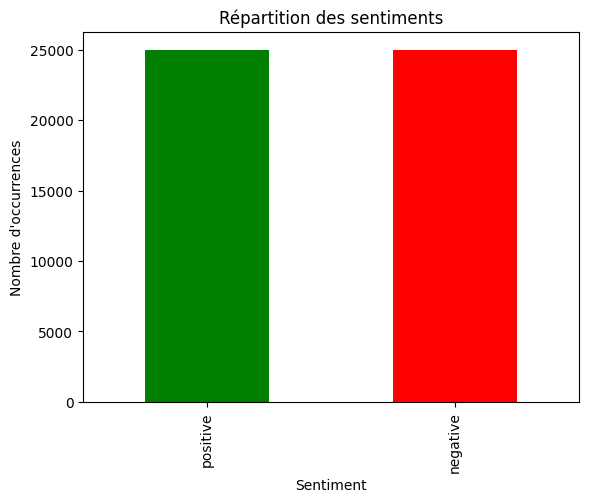

In [10]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Répartition des sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Nombre d'occurrences")
plt.show()


In [21]:
# afficher les statistique descriptif
df["review_length"] = df["review"].apply(lambda x: len(x.split()))
df["review_length"].describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64

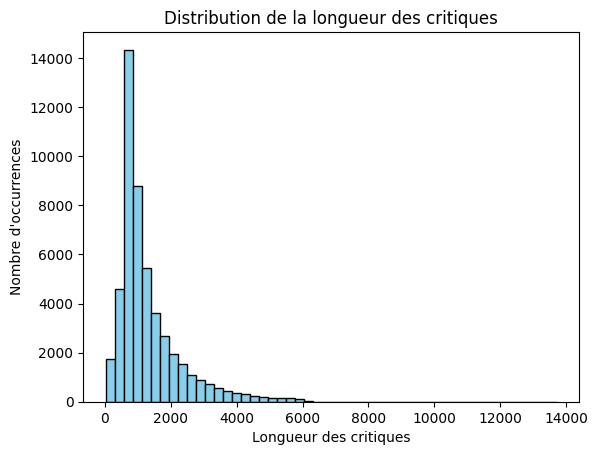

In [11]:
df['review_length'] = df['review'].apply(len)
df['review_length'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la longueur des critiques")
plt.xlabel("Longueur des critiques")
plt.ylabel("Nombre d'occurrences")
plt.show()


C:\Users\airac\AppData\Local\Temp\ipykernel_13368\3442799856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette={'positive': 'green', 'negative': 'red'})


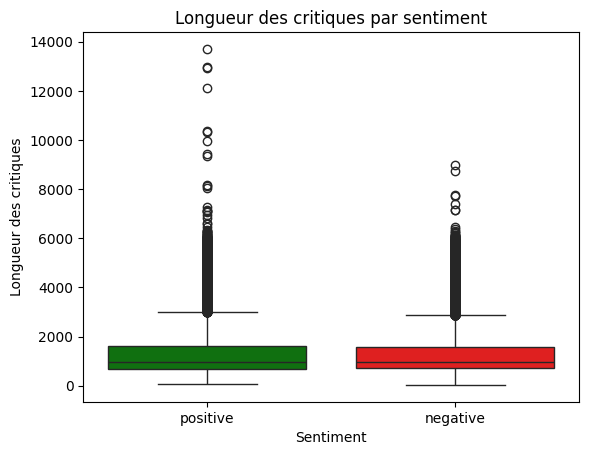

In [20]:
import seaborn as sns

df['review_length'] = df['review'].apply(len)
sns.boxplot(x='sentiment', y='review_length', data=df, palette={'positive': 'green', 'negative': 'red'})
plt.title("Longueur des critiques par sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Longueur des critiques")
plt.show()


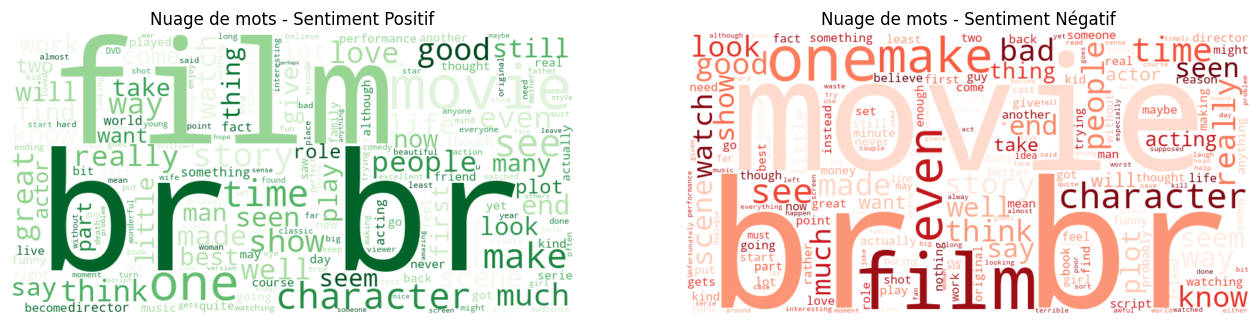

In [16]:
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Nuage de mots - Sentiment Positif")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Nuage de mots - Sentiment Négatif")
plt.axis('off')

plt.show()


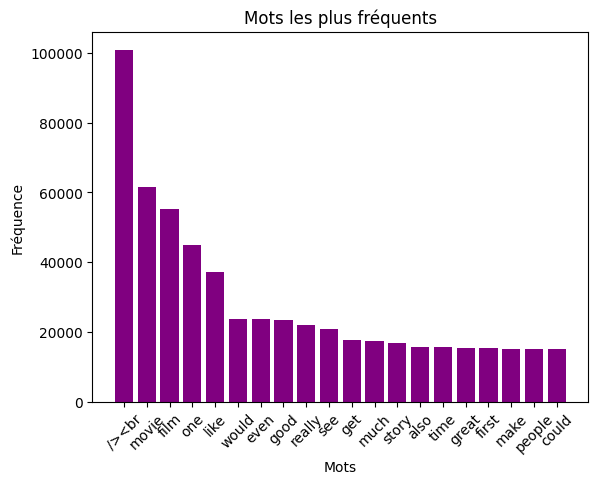

In [19]:
from collections import Counter
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))  # Filtre les mots inutiles (en anglais)
reviews = ' '.join(df['review']).lower()
words = [word for word in reviews.split() if word not in stop_words and word not in string.punctuation]

most_common_words = Counter(words).most_common(20)
words, counts = zip(*most_common_words)

plt.bar(words, counts, color='purple')
plt.xticks(rotation=45)
plt.title("Mots les plus fréquents")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.show()


In [18]:
#import nltk
#nltk.download('all')  # Télécharge tous les corpus (long mais complet)
# Ou pour des corpus spécifiques comme les stopwords :
#nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\airac\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\airac\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\airac\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\airac\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\airac\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

True

In [23]:
#supprimer les doublons
df = df.drop_duplicates()

In [24]:
print(df.duplicated().sum())

0


In [25]:
#conversion du texte en miniscule
df["clean_review"] = df["review"].str.lower()

In [42]:
#suppression des valises HTML
import re
from bs4 import BeautifulSoup
import html

def clean_html(text):
    if isinstance(text, str):  # Vérifie que le texte est bien une chaîne de caractères
        text = BeautifulSoup(text, "html.parser").get_text()  # Supprime les balises HTML
        text = html.unescape(text)  # Convertit les entités HTML en texte normal (ex: &amp; -> &)
        text = re.sub(r'<[^>]+>', '', text)  # Supprime toute balise restante
        text = re.sub(r'\s+', ' ', text).strip()  # Supprime les espaces inutiles
    return text

# Appliquer le nettoyage sur toute la colonne
df["clean_review"] = df["clean_review"].apply(clean_html)

C:\Users\airac\AppData\Local\Temp\ipykernel_13368\4155068075.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Supprime les balises HTML


In [43]:
#Vérification après suppression 
html_check = df["clean_review"].apply(contains_html)
nb_html_remaining = html_check.sum()
print(f"Nombre d'avis contenant encore des balises HTML après nettoyage : {nb_html_remaining}")

if nb_html_remaining > 0:
    print(df.loc[html_check, "clean_review"].head(5))
else:
    print("Toutes les balises HTML ont été supprimées avec succès !")

Nombre d'avis contenant encore des balises HTML après nettoyage : 0
Toutes les balises HTML ont été supprimées avec succès !


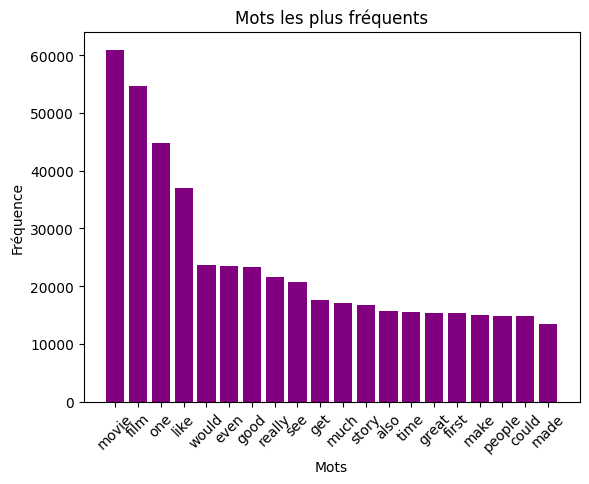

In [46]:
from collections import Counter
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))  # Filtre les mots inutiles (en anglais)
reviews = ' '.join(df['clean_review']).lower()
words = [word for word in reviews.split() if word not in stop_words and word not in string.punctuation]

most_common_words = Counter(words).most_common(20)
words, counts = zip(*most_common_words)

plt.bar(words, counts, color='purple')
plt.xticks(rotation=45)
plt.title("Mots les plus fréquents")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.show()


In [47]:
#supression de la ponctuation et les caracteres speciaux
df["clean_review"] = df["clean_review"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

In [ ]:
#Suppression des stopwords et tokenization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#nltk.download("stopwords")
#nltk.download("punkt")

stop_words = set(stopwords.words("english"))

df["clean_review"] = df["clean_review"].apply(lambda x: " ".join([word for word in word_tokenize(x) if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\airac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\airac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
#Vérifier la présence des stopwords 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Définir la liste des stopwords en anglais
stop_words = set(stopwords.words("english"))

# Fonction pour détecter si un texte contient encore des stopwords
def contains_stopwords(text):
    if isinstance(text, str):  # Vérifier que l'entrée est bien du texte
        words = word_tokenize(text)
        return any(word in stop_words for word in words)  # Renvoie True si un stopword est présent
    return False

# Appliquer la vérification sur toute la colonne
stopwords_check = df["clean_review"].apply(contains_stopwords)

# Compter le nombre d'avis contenant encore des stopwords
nb_stopwords_remaining = stopwords_check.sum()
print(f"Nombre d'avis contenant encore des stopwords : {nb_stopwords_remaining}")

# Afficher quelques exemples d'avis contenant encore des stopwords (s'il y en a)
if nb_stopwords_remaining > 0:
    print(df.loc[stopwords_check, "clean_review"].head(5))
else:
    print("Tous les stopwords ont été supprimés avec succès ! ")

Nombre d'avis contenant encore des stopwords : 0
Tous les stopwords ont été supprimés avec succès ! 


In [52]:
print(df["clean_review"])

0        one reviewers mentioned watching oz episode yo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: clean_review, Length: 49582, dtype: object


In [53]:
# Afficher quelques exemples de tokenization pour la première critique de la colonne 'clean_review'
df['tokenized_review'] = df['clean_review'].apply(word_tokenize)

# Afficher les 5 premières critiques avec leur tokenization
print(df[['clean_review', 'tokenized_review']].head(5))


                                        clean_review  \
0  one reviewers mentioned watching oz episode yo...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                    tokenized_review  
0  [one, reviewers, mentioned, watching, oz, epis...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, theres, family, little, boy, jake,...  
4  [petter, matteis, love, time, money, visually,...  


In [61]:
import spacy
import pandas as pd
from tqdm import tqdm  # Pour afficher la progression

# Charger le modèle spacy
nlp = spacy.load("en_core_web_sm")

# Fonction pour lemmatiser un texte avec une barre de progression
def lemmatize_reviews_spacy(df):
    tqdm.pandas(desc="Lemmatisation en cours...")  # Configure tqdm pour Pandas
    return df["clean_review"].progress_apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))

# Appliquer la lemmatisation avec une barre de progression
df["lemmatized_review"] = lemmatize_reviews_spacy(df)

# Afficher les résultats avant et après lemmatisation
for i in range(min(10, len(df))):  # Afficher les 10 premières critiques
    original_review = df["clean_review"].iloc[i]
    lemmatized_review = df["lemmatized_review"].iloc[i]
    print(f"Original Review {i+1}: {original_review}")
    print(f"Lemmatized Review {i+1}: {lemmatized_review}")
    print("-" * 50)

Lemmatisation en cours...: 100%|██████████| 49582/49582 [28:20<00:00, 29.16it/s]  


Original Review 1: one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate

In [68]:
#Représentation TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limite à 5000 mots les plus fréquents
X = vectorizer.fit_transform(df["lemmatized_review"])

In [69]:
import pandas as pd

# Convertir la matrice sparse en DataFrame pour l'afficher de manière lisible
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les 5 premières lignes
df_tfidf.head()


,aaron,abandon,abc,ability,able,aboard,abortion,abound,abraham,abrupt,...,york,you,young,youngster,youth,youtube,zero,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.043670,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.07834,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.065849,0.00000,0.0,0.0,0.0,0.0,0.113089,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099759,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [80]:
# Créer un DataFrame avec uniquement la colonne 'lemmatized_review'
df_clean = df[['lemmatized_review', 'sentiment']]

# Sauvegarder ce DataFrame dans un fichier CSV
df_clean.to_csv("cleaned_movie_reviews.csv", index=False)
